[Reference](https://github.com/neomatrix369/nlp_profiler)

In [1]:
%%bash

pip install git+https://github.com/neomatrix369/nlp_profiler.git@master
echo "Once successfully installed, please restart your Jupyter kernels for the changes to take effect"

  Cloning https://github.com/neomatrix369/nlp_profiler.git (to revision master) to /private/var/folders/59/k6h68_m55b9fd44rrtd3st840000gn/T/pip-req-build-r_t5bdbo
  Stored in directory: /private/var/folders/59/k6h68_m55b9fd44rrtd3st840000gn/T/pip-ephem-wheel-cache-utrtx5t1/wheels/d8/ae/ef/08bcfe7be09b90889b6f53bcef0a2f40eb63d2e954dcb20966
  Stored in directory: /Users/kang/Library/Caches/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built nlp-profiler emoji
  Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
Once successfully installed, please restart your Jupyter kernels for the changes to take effect


  Running command git clone -q https://github.com/neomatrix369/nlp_profiler.git /private/var/folders/59/k6h68_m55b9fd44rrtd3st840000gn/T/pip-req-build-r_t5bdbo
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/kang/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "/Users/kang/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/kang/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/kang/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
Attr

In [2]:
import pandas as pd

from nlp_profiler.core import apply_text_profiling

[nltk_data] Downloading package stopwords to /Users/kang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = '2833047 people live in this area. It is not a good area.'
text_with_two_numbers = '2833047 and 1111 people live in this area.'
text_with_punctuations = "This sentence doesn't seem to too many commas, periods or semi-colons (;)."
text_with_a_date = "Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "Todays date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = 'Everyone here is so hardworking. Hardworking people. I think hardworking people are a good trait in our company.'

In [4]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,I love ⚽ very much 😁.
1,2833047 people live in this area. It is not a ...
2,2833047 and 1111 people live in this area.
3,"This sentence doesn't seem to too many commas,..."
4,Todays date is 04/28/2020 for format mm/dd/yyy...
5,Todays date is 28/04/2020 and tomorrow's date ...
6,Everyone here is so hardworking. Hardworking p...


In [5]:
text_dataframe.describe()

,text
count,7
unique,7
top,2833047 people live in this area. It is not a ...
freq,1


In [6]:
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')
profiled_text_dataframe.head()

params: {}


,text,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised,...,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
0,I love ⚽ very much 😁.,0.380000,Pretty positive,Positive,0.43,Objective/subjective,Subjective,1.000000,Very good,Good,...,4,0,16,2,0,13,8,1,1,0
1,2833047 people live in this area. It is not a ...,-0.106818,Pretty negative,Negative,0.55,Objective/subjective,Subjective,0.968802,Quite good,Good,...,11,2,45,0,1,43,13,2,5,0
2,2833047 and 1111 people live in this area.,0.136364,Pretty positive,Positive,0.50,Objective/subjective,Subjective,1.000000,Very good,Good,...,6,0,35,0,2,34,8,1,3,0
3,"This sentence doesn't seem to too many commas,...",0.375000,Pretty positive,Positive,0.75,Pretty subjective,Subjective,0.923887,Quite good,Good,...,13,0,63,0,0,56,18,7,4,0
4,Todays date is 04/28/2020 for format mm/dd/yyy...,0.000000,Neutral,Neutral,0.00,Very objective,Objective,0.711513,Pretty good,Good,...,9,0,56,0,6,48,16,8,3,1


# Sentiment Analysis

In [7]:
profiled_text_dataframe['sentiment_polarity'].hist()

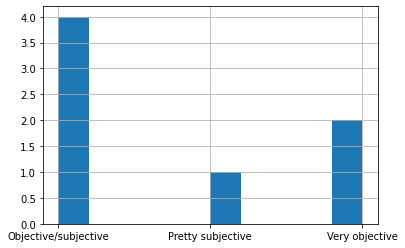

In [8]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

# Spelling quality check

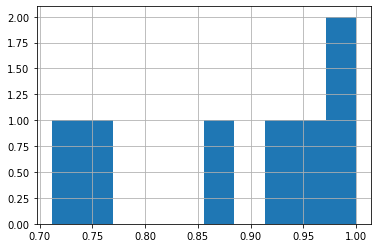

In [9]:
profiled_text_dataframe['spelling_quality_score'].hist()

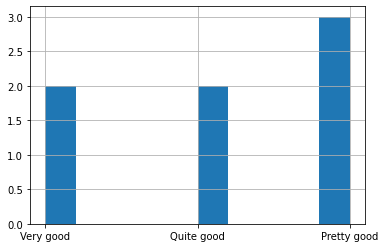

In [10]:
profiled_text_dataframe['spelling_quality'].hist()

In [11]:
profiled_text_dataframe.describe()

,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000
mean,0.212078,0.404286,0.887087,2.428571,61.285714,9.571429,9.857143,1.000000,51.714286,0.285714,2.142857,47.428571,13.857143,4.00000,3.714286,0.428571
std,0.285829,0.293193,0.118690,0.786796,28.182230,3.909695,4.670067,1.290994,24.560906,0.755929,2.734262,23.971213,4.634241,2.94392,1.889822,0.786796
min,-0.106818,0.000000,0.711513,2.000000,21.000000,5.000000,4.000000,0.000000,16.000000,0.000000,0.000000,13.000000,8.000000,1.00000,1.000000,0.000000
25%,0.000000,0.215000,0.802705,2.000000,49.000000,7.500000,7.000000,0.000000,40.000000,0.000000,0.000000,38.500000,10.500000,1.50000,3.000000,0.000000
50%,0.136364,0.500000,0.923887,2.000000,60.000000,8.000000,9.000000,0.000000,52.000000,0.000000,1.000000,46.000000,14.000000,3.00000,3.000000,0.000000
75%,0.377500,0.575000,0.984401,2.500000,69.000000,11.000000,12.000000,2.000000,59.500000,0.000000,4.000000,52.000000,17.000000,6.50000,4.500000,0.500000
max,0.700000,0.750000,1.000000,4.000000,112.000000,17.000000,18.000000,3.000000,95.000000,2.000000,6.000000,92.000000,20.000000,8.00000,7.000000,2.000000
